## Reading a File
In programming it's common to work with files. For example, you might need to analyze data from a file (e.g csv, txt) or save your work into a file. Let's first look at how to open/read a file.

The `open` function is used to interact with files, enabling you to read or write data. It accepts the `filename` as its primary argument and can be accompanied by other optional parameter like the `mode` parameter, which dictates the manner in which the file is opened. While various modes are available, the default mode is `'r'`, signifying read-only access. Others include:

* `'r+'` for reading and writing. If the file doesn't exist, it raises a `FileNotFoundError`. If the file does exist it overwrite existing content.
* `'w'` for writing only,  If the file already exists, it truncates(overwites) the content.
* `'w+'` for reading and writing. `w+` automatically creates a new file if file doesn't exist. If the file already exists, it truncates(overwites) the content.  
* `'a'` for appending/writing to the end of a file. It automatically creates a new file if file doesn't exist.
* `'a+'` for reading and appending/writing to the end of a file. It automatically creates a new file if file doesn't exist. 
* `'x'`: represents the "exclusive creation" mode. It's used for creating a new file but raises an error if the file already exists. This prevents accidentally overwriting an existing file.
* `'t'`: Text mode (default). Used with other modes to treat the file as text e.g `'rt'` for reading a text file. This is redundant since by default files are treated as text.
* `'b'`: Binary mode. Used alongside other modes to treat the file as binary data e.g `'rb'` for reading a binary file..

The `open` function returns a _file object_ which has a `read()` method to view the content of the file.

In [ ]:
f_obj = open('anthem.txt', 'r')
f_obj   # A file object

In [ ]:
f_obj.read()      # Using the read() method of a file object

In [ ]:
f_obj = open('anthem.txt', 'r')
print(f_obj.read())         # Used the print function to properly render the text.

Some of the commonly used attributes and methods of a file object includes:

* `name`: Determines the name of the file.
* `mode`: Determines the mode in which the file is open
* `closed`: Determines if the file is closed or not 
* `read([size=-1])`: Reads and returns the specified number of bytes from the file. If no size is specified, or if the size is negative, it reads the entire file.
* `write(string)`:Writes the given string to the file. Overwrites existing content if the file is opened in write mode.
* `readline()`:Reads and returns a single line from the file, including the newline character.
* `readlines()`:Reads all lines from the file and returns them as a list of strings, including newline characters.
* `writelines(lines)`: Writes a list of strings to the file. Strings are concatenated without adding newline characters.
* `seek(offset)`: Moves the file pointer to the specified `offset` position.
* `tell()`: Returns the current position of the file pointer.
* `close()`:  Used to properly close a file. Closing the file ensures that any resources associated with the file are released, such as file handles, memory buffers, etc

In [ ]:
f_obj.name             # Determines the name of the file

In [ ]:
f_obj.mode             # Determines the mode in which the file is open

In [ ]:
f_obj.closed           # Determines if the file is closed or not

In [ ]:
f_obj = open('anthem.txt', 'r')
f_obj.read(5)    # Returns five characters from the current position of the cursor

The `read` method shift the file pointer's position by the number of bytes read. The `tell` method tells you the current position of the file pointer:

In [ ]:
f_obj.tell()

We can move the position of the file pointer using the `seek` method:

In [ ]:
f_obj.seek(7)      # Offset the file pointer's position by 7 bytes from the beginning of the file
f_obj.tell()

In [ ]:
f_obj.read(12)

In [ ]:
f_obj.tell()

It is normally good to close your file once done with it to avoid data loss or corrupting the file. The `close()` method helps to achieve this. Once a file is closed, you can no longer access it until you open it again.

In [ ]:
f_obj.close()

In [ ]:
f_obj.closed      # The file is now closed

Using Python's built-in mechanisms for managing file access is generally considered a good programming practice. Rather than manually closing a file using the close line, it's recommended to allow Python to handle this process for you. This approach mitigates the risk of leaving a file improperly closed due to unexpected errors that might occur before reaching the close statement.

Furthermore, relying on Python to manage file closures helps you avoid potential issues where access to a file could be denied due to it still being in use. Python's automated file closure ensures that resources are appropriately released.

A streamlined way to achieve this is by utilizing the `with` statement, which establishes a context for the file operations. The context manager takes care of automatically closing the file when you're finished with it. Here's how it works:

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    content = f_obj.read()
    print(content)

You can read through each line by using the `readline()` method to return a single line at a time.

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    print(f_obj.readline())

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    print(f_obj.readline())
    print(f_obj.readline())

### Looping Through Files
Instead of using `readline()` to return each line, we can use the `for` loop to print out each lines of the file.

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    for line in f_obj:                     # Loop through each line and print
        print(line)      
       

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    for line in f_obj:
        print(line.strip()) # The strip method removes the spaces in between lines

### Working with File Content
To work with file content, you can use the `readlines()` (note the __'s'__), to return all the content of a file into a __list__ that can be processed later (outside the `with` block)

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()   # returns a list
    print(lines)

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()
    for line in lines:     # loop through the list
        print(line.strip())

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()

lines            #called outside the 'with' block

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()

for line in lines:                    #looping through the content outside the with block
    print(line.strip())

In [ ]:
# The following code replaces 'our' with 'my'

with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()

for line in lines:
    line = line.replace(' our', ' my')
    print(line.strip())

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()

len(lines)     #Count the number of lines in the text

To count all the words in the contents of the file, we need to remove all the non-alphabetical characters. In this case we remove the the commas and whitespaces in the text before spliting, after that we can apply `len` function on the result.

In [ ]:
line_1 = 'Arise, O Compatriots'
line_1.split()

In [ ]:
line_1 = 'Arise, O Compatriots'
sentence = line_1.replace(',', '')
print(sentence)
sentence.split()       # 3 words in the returned list

In [ ]:
with open('anthem.txt', 'r') as f_obj:
    lines = f_obj.readlines()

count = 0    
for line in lines:
    sentence = line.replace(',', '')
    splitted_sentence = sentence.split()
    count += len(splitted_sentence)
    
count

## Writing to a File
To write to a file you specify the name of the file provided as an argument in the open function along with corresponding mode (`w` or `w+`). The write() method is use to write into the opened file. An Example is given below.

In [ ]:
with open('my_note.txt', 'w') as f:
    f.write("My Hobbies:")

This automatically creates a new file in the current working directory and write our message as shown in the image below:
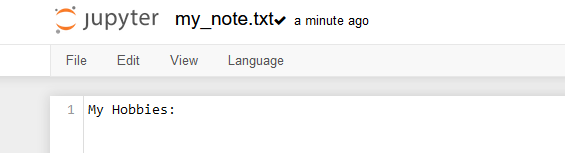

We can also view this in Python using the `read()` method: 

In [ ]:
with open('my_note.txt', 'r') as f:
    print(f.read())

Multiple lines can also be written to a file as shown below:

In [ ]:
with open('my_note.txt', 'w') as f:
    f.write("My Hobbies:")
    f.write("I Love going shopping with my friends")
    f.write("I also love riding bicycle")

In [ ]:
with open('my_note.txt', 'r') as f:
    print(f.read())

The file is not exactly in the right format as we do expect. we can format it using whitespace such as spaces, `\n`, `\t`

In [ ]:
with open('my_note.txt', 'w') as f:
    f.write("My Hobbies:\n")
    f.write("I Love going shopping with my friends\n")
    f.write("I also love riding bicycle\n")

In [ ]:
with open('my_note.txt', 'r') as f:
    print(f.read())

Rather than using multiple `write`, we can put all the lines/strings in a list and use `writelines` to write them to a file:

In [ ]:
lines = ["My Hobbies:", "\nI Love going shopping with my friends", "\nI also love riding bicycle" ]
with open('my_note.txt', 'w') as f:
    f.writelines(lines)

In [ ]:
with open('my_note.txt', 'r') as f:
    print(f.read())

### Appending to a File
Writting to a file automatically erase the content of the file if it exist, before writing to it. Therefore you must be careful not to use a filename that already exist unless you're absolutely sure you want to rewrite its content. To append to a file that already exist, use the append (`a`) mode.

In [ ]:
with open('my_note.txt', 'a') as f:
    f.write("\nI read novels when I'm bored\n")
    f.write("Programming in Python is what I enjoy most\n")

In [ ]:
with open('my_note.txt', 'r') as f:
    print(f.read())

## Relative and Absolute file Path 

A file path is the direction to the location of a file on your computer. We have been working with files that are directly under under our current directory. The current working directory is the directory where you saved the current Python file or Jupyter notebook you are working on. If the file doesn't exist in the current working directory an error occurs because the file specified (through its name-- the way we have been using it) won't be found. To avoid this we must specify its location either ralatively or absolutely. 

You can specify a file path relatively if the file exist along the path of the working directory. For example let's say the  file exist in a folder under the working directory, we can write the file path like this:

    folder_name/file_name.txt
Let's see an example of this below. I created a new folder in the current directory name _new_folder_,  inside it is a file name _pledge_.

In [ ]:
with open('new_folder/pledge.txt', 'r') as file_object:
    print(file_object.read())

In [ ]:
filename = 'new_folder/pledge.txt'
with open(filename, 'r') as file_object:
    print(file_object.read())

Assuming the file is anywhere on our system, we can use its absolute file path, something that look like this for windows and linux OS respectively:

    'C:/Users/Desktop/documents/text_folder/filename.txt'
    '/home/user/documents/text_folder/filename.txt'

### JSON

Java Script Object Notation (JSON) is another way of storing data. json was originally developed for JavaScript but Python and other programming language have adopted it because of its lightweight and ease of sharing data with other programs. To use it, we need to import the json module.

In [ ]:
import json

cities = ['lagos', 'miami', 'dakar', 'new york', 'berlin']
with open('cities.json', 'w') as f:       # Open a file
    json.dump(cities, f)

In the above cell we create a list of `cities`, open a new file call `cities.json`, the list is then write into the file object return by `open` using `json.dump()`. This takes two arguments, the first is the object you want to save and the second is the file (object) you are saving into. 

To open a json file, we simply use `json.load()` which takes an argument of the json filename.


In [ ]:
with open('cities.json', 'r') as f:     # Open the json file
    cities = json.load(f)               # Read the file
    print(cities)

In [ ]:
def user(f_name, l_name, age, country='nigeria', **user_info):
    "Returns a dictionary of user data"
    user_info['f_name'] = f_name
    user_info['l_name'] = l_name
    user_info['age'] = age
    user_info['country'] = country
     
    return(user_info)  

In [ ]:
f_name = input('Enter first name: ')
l_name = input('Enter last name: ')
middle_name = input('Enter middle name: ')
age = int(input('Enter your age: '))
country = input("Country (Nigeria by default)")

new_user = user(f_name, l_name, age, middle_name=middle_name, country = country )
with open('users.json', 'w') as f:
    json.dump(new_user, f)

In [ ]:
with open('users.json') as f:
    users = json.load(f)
    print(users)

In [ ]:
with open('users.json') as f:
    users = json.load(f)
    
print(f"{users['f_name']} {users['l_name']}")

## Errors and Exceptions

You have come across lot of errors during the course of learning Python. In programming there are two major type of errors: Syntax and Logical error. Syntax error also known as parsing error is a way a program raise a complain about an 'inappropriate' code. An example of syntax error is shown in the cell below.

In [ ]:
## Syntax error
for number in range(10)
    print(number)

If you look at the error message carefully (always learn to read error messages), you will notice there's a colon missing(`:`) which the little up arrow (`^`) is trying to notify us about. On the other hand, logical errors are not obvious to a program and therefore they never raise an error. Logical error are error in logic or reasoning by the programmer and not a mistake in the programming language. In such cases, result returned by the program is logically incorrect. An example of such is converting hours to minutes by dividing by  60 instead of multiplying.

A program can also raise an error, not necessarily because the statement or expression is syntactically incorrect but because an error was encountered in executing that statement. This is called runtime error or ***exceptions***. When an exception occurs, it interrupts the normal flow of the program and the system raises an error message that indicates what went wrong.

Here are some examples of common exceptions in Python:
* `TypeError`: Raised when an operation or function is applied to an object of inappropriate type.
* `ValueError`: Raised when a function is called with an argument of the correct type, but with an inappropriate value.
* `IndexError`: Raised when a sequence index is out of range.
* `KeyError`: Raised when a dictionary key is not found in the dictionary.
* `ZeroDivisionError`: Raised when division or modulo by zero is encountered.
* `FileNotFoundError`: Raised when a file or directory cannot be found.

In [ ]:
x = 10
y = "hello"
z = x + y     # This will raise a TypeError

In [ ]:
int('2')

In [ ]:
x = int("hello")  # This will raise a ValueError

In [ ]:
my_list = [1, 2, 3]
print(my_list[3])      # This will raise an IndexError

In [ ]:
my_dict = {"a": 1, "b": 2, "c": 3}
print(my_dict["d"])       # This will raise a KeyError

In [ ]:
x = 10
y = 0
z = x/y  # This will raise a ZeroDivisionError  

In [ ]:
f = open("nonexistent_file.txt")     # This will raise a FileNotFoundError

### Handling Exceptions
Python provides a way of handling this exceptions using the `try` statements. The general form is given as:

    try:
        some code...
    except an_error:
        do this then

Examples of how to handle some of the exeptions listed above is given below: 

In [ ]:
## TypeError

x = 10
y = "hello"

try:
    z = x + y       # This will raise a TypeError
except TypeError:
    print("You can't add a number and a string")

In [ ]:
## ValueError

x = input("Enter the first number: ")
y = input("Enter the second number: ")

try:  
    z = int(x) / int(y)         # ValueError will occur if one of the number is not of the appropriate value.
    print(z)                    # A digit string is required for both x and y. 
except ValueError:   
    print("Kindly enter a valid number")

In [ ]:
## FileNotFoundError

try:
    f = open("nonexistent_file.txt")  # This will raise a FileNotFoundError
except FileNotFoundError:
    pass

In the above code we allow the program to *fail silently* by using the `pass` statements. The `pass` statement in Python is a placeholder statement that serves as a no-operation or null operation. It doesn't perform any action and is often used as a placeholder where syntactically some code is required but you don't want to execute any actual instructions.

An error can also be assign to a variable for later use by using the `as` statements:

In [ ]:
x = 10
y = "hello"

try:
    z = x + y  # This will raise a TypeError
except TypeError as e:
    print("You can't add a number and a string")
    print(f"Class: {type(e)}")        # print the class of the error
    print(f"message: {e}")            # Print the error message
    print(f"{e=}")                    # Print the full error message 


### The `else` Clause
The `else` clause can be use to execute a block of codes if no exceptions occurs. **The else block will only run if there are no exceptions in the `try` block** and control then resumes below the entire `try` block. Hence, the `else` block depends entirely on the try statement being successful. If there are exceptions, there must be a proper `except` *clause* to handle it, if not the program crashes.

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")

try:
    z = int(x) / int(y)      # ValueError will occur if one of the number is not of the appropriate value.                             # A digit string is required for both x and y. 
except ValueError:   
    print("Kindly enter a valid number")
else:
    print(z)

Assuming we have a program that perform certain calculations, we might want to avoid `TypeError`, `ZeroDivisionError`, `ValueError` or any other type of error that may occur in the `try` block by using more than one `except` clause.

In the program above, we successfully handle the `ValueError` exception in our program that may occur if someone tries to supply an invalid input. In this case the valid input should be a number (digit), otherwise when converting the string  to an integer (remember the `input` function will return a string), we will have a `ValueError`. But what happens if the value for y is zero, we would not have a `ValueError` but `ZeroDivisionError`. We have to find a way to handle that also:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")

try:
    z = int(x) / int(y)      # ZeroDivisioError wiil occur if y is zero 
except ValueError:   
    print("Kindly enter a valid number")
except ZeroDivisionError:
    print("Can't divide a number with zero")
else:
    print(z)

More exceptions can be included. if for example, we decided to add z to a non-existing list, the program will raise a `NameError` exception:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")

try:
    x = int(x)
    y = int(y)
    z = x / y     
    some_list.append(z)     # NameError will be raised. 'some_list' does not exist
except ValueError:   
    print("Kindly enter a valid number")
except ZeroDivisionError:
    print("Can't divide a number with zero")
except NameError:
    print("some_list doesn't exist")
else:
    print(some_list)


In the above cell, `some_list` does not exist and there is an exception handler in our `try` block that handles the `NameError`, but if there exist `some_list`, the block of code under the try statement will be successful and no exception will be raised which in turn will cause the `else` block to execute (which just print the list). 

If the list does exist but we decided we needed the item at the fifth index, the program will raise an `IndexErorr` exception if the list is not up to that range:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")
some_list = []
try:
    x = int(x)
    y = int(y)
    z = x / y     
    some_list.extend([x, y, z])
    a = some_list[5]                # This will raise IndexErorr        
except ValueError:   
    print("Kindly enter a valid number")
except ZeroDivisionError:
    print("Can't divide a number with zero")
except NameError:
    print("some_list doesn't exist")
except IndexError as e:
    print(e)
else:
    print(some_list)
        

Multiple exceptions could be passed to an `except` clause using a tuple:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")
my_list = []
try:
    x = int(x)
    y = int(y)
    z = x / y     
    my_list.extend([x, y, z])
    a = my_list[5]                # This will raise IndexErorr        
except ValueError:   
    print("Kindly enter a valid number")
except ZeroDivisionError:
    print("Can't divide a number with zero")
except (NameError, IndexError):    # handles both NameError and IndexError
    print("Something went wrong ") 
                         
else:
    print(my_list)




When passing multiple exceptions, to know which of the exceptions was raised, we could save the error as a variable and print it:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")
my_list = []
try:
    x = int(x)
    y = int(y)
    z = x / y     
    my_list.extend([x, y, z])
     a = my_list[5]                   
except (ValueError, ZeroDivisionError, NameError, IndexError) as error: 
    print("One of the exceptions occurred ")
    print(f"{error=}")
else:
    print(my_list)
    


Sometimes we may not be able to determine ahead what exceptions might occur in a program, Python provides a way of catching
any exception that is derived from the base class `BaseException`. This includes common exceptions such as `TypeError`, `NameError`,  and `ValueError`, as well as other less commonly used exceptions:

In [ ]:
x = input("Enter the first number: ")
y = input("Enter the second number: ")

try:
    x = int(x)
    y = int(y)
    z = x / y                     
except Exception: 
    print("One of the exceptions occurred")
    print(e)
else:
    print(z)

We could have alised the `except Exception` statement as a variable and determine the actual exception that was raised. It's generally recommended to be specific about the exceptions you catch and handle, rather than using a broad catch-all `except Exception` statement. This can help you better understand and debug your code, as well as prevent unexpected errors from being masked.

### The `finally` Clause
Another clause belonging to the `try` statements is `finally`. The block of code under the `finally` statements runs irrespective of whether the `try` block is successful or an exception was raised.

In [ ]:
x = 3
y = 'hi'
try:
    z = x / y                     
except ZeroDivisionError: 
    print("Can't divide by zero")   
else:
    print(z)
finally:
    print("finally always executes")

In the above program, the `try` block was successful, hence the `else` block was executed but also the `finally` block. If the `try` block fails, the finally block still executes irrespective of whether there is a proper `except` clause to handle the failure or not:

In [ ]:
x = 3
y = 0
try:
    z = x / y                       # Raise ZeroDivisionError
except ZeroDivisionError:           # Proper except clause to handle the error
    print("Can't divide by zero")   
else:
    print(z)
finally:
    print("finally always executes")

In [ ]:
x = 3
y = 0
try:
    z = x / y                        # Raise TypeError            
except ZeroDivisionError:            # No proper except clause to handle the TypeError
    print("Can't divide by zero") 
except Exception:
    print("An exception occurs")
else:
    print(z)
finally:
    print("finally always executes")

The `finally` clause is usually use to close a file irrespective of whether the file is used or not. A pictoral summary of the `try` statements and its clauses is shown below:
$$ $$


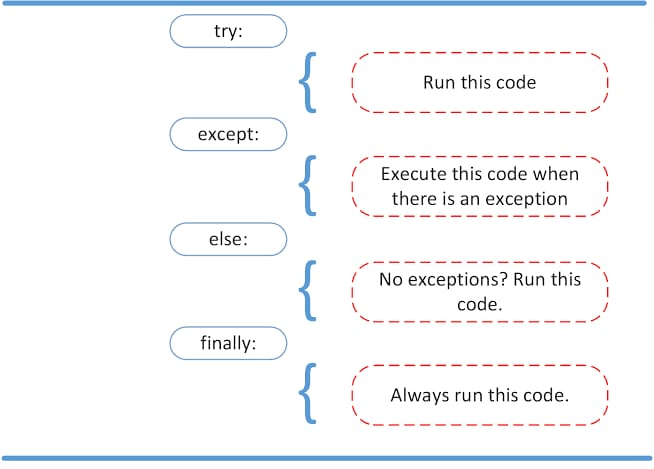
    

We could employ the technique we treated so far in dealing with multiple files. Assuming we want to apply the word count program we created ealier to multiple files, we could write something like this:

In [1]:
files = ['anthem.txt', 'new_folder/pledge.txt', 'my_note.txt']
for file in files:
    f_obj = open(file, 'r')
    lines = f_obj.readlines()

    count = 0    
    for line in lines:
        sentence = line.replace(',', '')
        splitted_sentence = sentence.split()
        count += len(splitted_sentence)

    print(f"{file} contains {count} words")

anthem.txt contains 41 words
new_folder/pledge.txt contains 33 words
my_note.txt contains 28 words


But what if there was a non-existent file present in the list of files.`FileNotFoundError` will prevent the program from going to completion:

In [2]:
files = ['anthem.txt', "nonexistent_file.txt", 'new_folder/pledge.txt', 'my_note.txt']
for file in files:
    f_obj = open(file, 'r')
    lines = f_obj.readlines()

    count = 0    
    for line in lines:
        sentence = line.replace(',', '')
        splitted_sentence = sentence.split()
        count += len(splitted_sentence)

    print(f"{file} contains {count} words")

anthem.txt contains 41 words


FileNotFoundError: [Errno 2] No such file or directory: 'nonexistent_file.txt'

The `FileNotFoundError` prevent the last two files to be counted. This can be handled by using the `except` block to silent this error and allow the program to continue:

In [ ]:
files = ['anthem.txt', "nonexistent_file.txt", 'new_folder/pledge.txt', 'my_note.txt']

for file in files:
    try:
        f_obj = open(file, 'r')        
    except FileNotFoundError:                 # Handles FileNotFoundError
        print(f"{file} does not exist")       
    except Exceptions:                        # Handles other errors that might arise
        print("An error occur while reading the file")
    else:
        lines = f_obj.readlines()
        count = 0    
        for line in lines:
            sentence = line.replace(',', '')
            splitted_sentence = sentence.split()
            count += len(splitted_sentence)
        print(f"{file} contains {count} words")  
    finally:
        f_obj.close()
        

### Raising An Error With `raise`
Sometimes when working with user data, it is necessary to have the right set of input. If in any case you get an inappropriate input for a program or an inappropriate argument was passed to a function, you can raise an exception using the `raise` keyword to inform the user what your program or function expected. An example of using `raise` is giving below:


In [ ]:
def sqrt():
    """A function that calculates the square root of a positive number"""
    
    x = input("Give me a positive number and I will find its square root: ")
    x = float(x)
    if x < 0:
        raise ValueError("Positive number required")
    else:
        return x**0.5

sqrt()

From the code above we can see that if any number is less than zero (negative), a `ValueError` exception with the appropriate message will be raised

### Defining a Custom Error
Python allows you to create your own custom exceptions from the base `Exception` class or its subclasses:

In [ ]:
class MyException(Exception):
    pass

def sqrt():
    x = input("Give me a positive number and I will find its square root: ")
    x = float(x)
    if x < 0:
        raise MyException("Positive number required")
    else:
        return x**0.5

sqrt()

Parents attributes and methods of the `Exception` class can be overwrite and also new attributes and methods can be added. Lets define an exception that returns the time of error. To do this, we'll use the datetime module to import the `datetime` class and then use the `now()` method of the `datetime` class to get the current date and time:

In [ ]:
from datetime import datetime
datetime.now()

In [ ]:
print(datetime.now())

In [ ]:
class MyException(Exception):
    """A Custom exception that includes a timestamp at which an error was raised"""
    
    def __init__(self, message):
        from datetime import datetime
        self.message = message
        self.time = datetime.now()
        
    def __str__(self):
        return f"{self.message}. Timestamp:{self.time}"
    

def sqrt():
    x = input("Give me a positive number and I will find its square root: ")
    x = float(x)
    if x < 0:
        raise MyException(message='Positive number required')
    else:
        return x**0.5

    
sqrt()

`MyException` class was modified to have a Timestamp attribute created within the `__init__` method by importing the datetime function from the datetime module and using the `now()` method to get the system current time. The Timestamp generated was then use to modify the message (by including a Timestamp) in the `__str__` method of the parent class, `Exception`.

*Copyright &copy; 2025 DataClax. This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*